# Udacity nano degree - Data Science Project
### Created by Albert Yao  

### Structure

* **Goal of the project**
* **Data Prepocessing**
* **Exploratory Data Analysis**   
>            1.Assumptions & Approach
             2.Insights & Findings 
* **Business Questions** 
>            1.Assumptions & Approach
             2.Insights & Findings 
* **Model/Deploy** 
>            1.Assumptions & Approach 
             2.Insights & Findings 


## Goal of the Project
#### From the course,  try to apply CRISP-DM process when anazlying the data. It could be broken down:
    a. Business Understanding (come up with questions of your own and answer it from the data)
    b. Data Understanding
    c. Prepare data 
    d. Model data
    e. Results
    f. Deploy
   
_1)_ I first set our goal as ** making a profit on investing selected loans**.

_2)_ Further break down ** making a profit on investing selected loans**: 

> - Invest in loans **with lower risk to default**.
- Target **high return rate & profit size** loans. 

_3)_ Focus on exploring variables that:

> - Potentially could have a huge impact on loss (default) rate.
- Potentially could split loan into reasonable groups.   

_4)_ Define general metrics that:

> - Could evaluate **profit rate & size** across different types of loans.  
- Could evaluate **loss rate**. 



### Data Preprocessing
_1)_ Explore different variables, understand their distribution and values.

_2)_ Drop columns that have too many missing(nan, +-inf) values.
> - Create metric to evaluate the frequency of missing values. 
- Choose a reasoable number to make the cut in order to drop the columns.

_3)_ Target loans that are not "current" for our analysis.  
> - Exclue rows that col(loan_status) = 'Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Issued'.

_3)_ Define good and bad loan: 

> - Good : col(loan_status) = 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'.
- Bad : col(loan_status) = 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default'.



### Data Preprocessing Part I
- Understand the nature of the data by checking all the columns 
- Explore col(loan_status)

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [3]:
dg = pd.read_csv('loan.csv', low_memory=False)
dg.head()
df = pd.read_csv('loan.csv', low_memory=False)
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

 

**Note** : **Charge off** 

  > The credit grantor wrote your account off of their receivables as a loss, and it is closed to future charges. When an account displays a status of "charge off," it means the account is closed to future use, although the debt is still owed.
  
  > The credit grantor may continue to report the past due amount and the balance owed. If you pay the account, the status will reflect as a "paid charge-off."

### Data Prepocessing Part II

- Check missing value 
- Drop columns with missing value > 0.5 
- Classify loans into good&bad loan based on col(loan_status)
- Select loans that are its status are not "current"

In [5]:
#print(df[df.isnull().any(axis=1)]).sum()
percent = df.isnull().sum()/len(df)
missing_value = pd.concat([df.isnull().sum(), percent], axis=1)
missing_value_re = missing_value.rename(columns = {0 : 'Total', 1 : 'Percent'})
missing_value = missing_value_re[
            missing_value_re.iloc[:,1] != 0].sort_values(
        'Percent', ascending=False).round(2)
missing_value = missing_value.loc[missing_value['Percent'] > 0.5]
missing_value

,Total,Percent
dti_joint,886870,1.00
annual_inc_joint,886868,1.00
verification_status_joint,886868,1.00
il_util,868762,0.98
mths_since_rcnt_il,866569,0.98
total_cu_tl,866007,0.98
inq_fi,866007,0.98
all_util,866007,0.98
max_bal_bc,866007,0.98
open_rv_24m,866007,0.98


In [6]:
drop_columns = []
for item in missing_value.index:
    drop_columns.append(item)
df = df.drop(drop_columns, axis=1)
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year
#df.head()

In [7]:
#exclue all the current loans!! 
df=df[(df['loan_status']!='Current')&(df['loan_status']!='Late (31-120 days)')&
      (df['loan_status']!='Late (16-30 days)')&(df['loan_status']!='In Grace Period')
     &(df['loan_status']!='Default')]

In [8]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off"]
good_loan = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']

df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    elif status in good_loan:
        return 'Good Loan'
    else:
        return 'current'
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

### Exploratory Data Analysis
_1)_ Explore col(emp_length)'s relationship with good & bad loans.
> - Focus on "emp_length". Check whether it could be used to further classify loans into groups.

_2)_ Define metrics when evaluating loan profit:
> - **Annualized Profit Rate**,   **Annualized Profit Size**,   **Loss Rate (not annulazied)**.
- Check the definition of the above metrics from Q2. 



_2)_ Explore col(loan_purpose)'s relationship with good & bad loan.  
> - Further classify loans into groups based on summary statistics and charts. 
- LossRate X Purpose bar chart 
- LossRate X Purpose scatter plot
- LossRate X Profit scatter plot





#### employment history 


#### plot employment history graph 

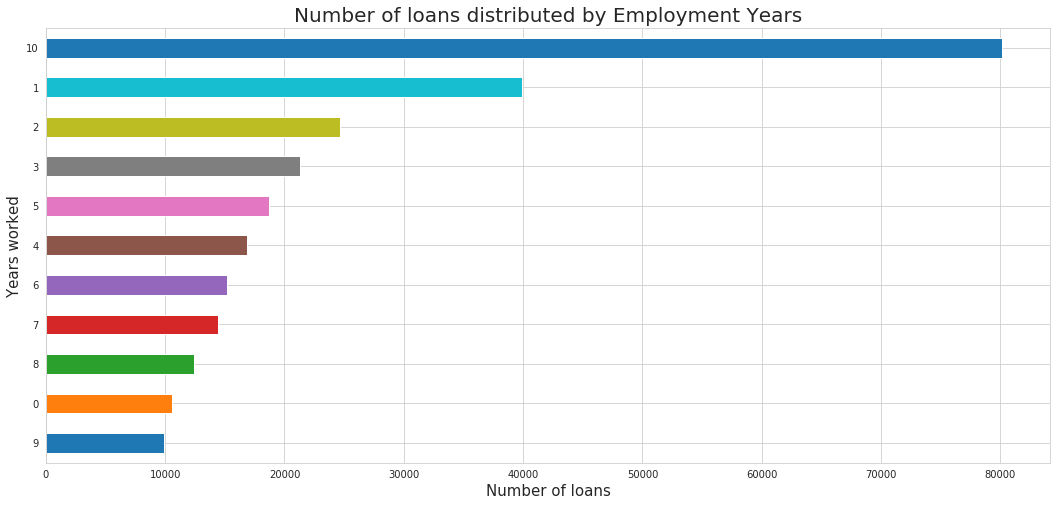

In [9]:
df['emp_length'].fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

#### Explore the relationship of (good/bad) loan with emp_length

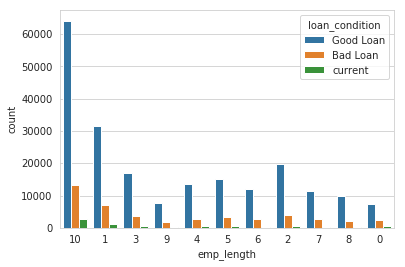

In [10]:
ax = sns.countplot(x="emp_length", hue="loan_condition", data=df)


####                                                                       Define metrics when evaluating loan profit


In [11]:
df['term_num'] = df['term'].str.slice(0,3).apply(pd.to_numeric)
df['annual_profit_rate']= (df['total_pymnt_inv']/df['funded_amnt_inv'])**(1/df['term_num']/12)
df['annual_profit_size'] = (df['total_pymnt_inv']-df['funded_amnt_inv'])/(df['term_num']/12)

In [12]:
# we do not further classify 36months and 60months loan so far for loss_rate% => not annualized 
data = []
for i in range(1,11):
    emp_df = df[(df["emp_length"]==str(i))]
    bad = len(df[(df["emp_length"]==str(i))&(df["loan_condition"]=="Bad Loan")]) 
    good = len(df[(df["emp_length"]==str(i))&(df["loan_condition"]=="Good Loan")])

    #annual_profit_rate
    ann_rate = emp_df['annual_profit_rate']
    ann_rate_list = []
    for int_rate in ann_rate:
        if math.isnan(int_rate):
            pass
        else:
            ann_rate_list.append(float(int_rate))
#    print(ann_rate_list)
    avg_int_rate = sum(ann_rate_list)/len(ann_rate_list)        
    content = [i,bad,good,avg_int_rate]
    data.append(content)

test = pd.DataFrame(data,columns=['emp_length','good_loan','bad_loan','avg_int_rate'])  
#loss rate but not yet specified on 36 or 60 months
test['loss_rate%']=(test['good_loan'])/(test['bad_loan']+test['bad_loan'])
test.sort_values('loss_rate%',ascending = False)

,emp_length,good_loan,bad_loan,avg_int_rate,loss_rate%
8,9,1798,7851,0.969673,0.114508
6,7,2634,11551,0.980831,0.114016
5,6,2738,12159,0.977910,0.112591
7,8,2186,9770,0.964531,0.111873
0,1,7018,31544,0.965312,0.111241
4,5,3253,14978,0.972081,0.108593
2,3,3606,17040,0.967036,0.105810
3,4,2831,13571,0.970327,0.104303
1,2,4116,19794,0.970677,0.103971
9,10,13289,64062,0.964044,0.103720


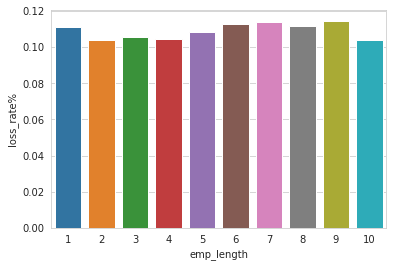

In [13]:
ax = sns.barplot(x="emp_length", y="loss_rate%", data=test)


#### Explore Loan Purpose 
 - Decide if loan purpose is a good variable to further classify it by group.
 - Explore the relationship of loss rate, profit rate to loan purpose.


### loss rate annualized X purpose statistics

In [14]:
df[['purpose','loan_condition']]
purpose = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']
data = []
for item in purpose:
    purpose_df = df[(df["purpose"]==item)]
    bad = len(df[(df["purpose"]==item)&(df["loan_condition"]=="Bad Loan")]) 
    good = len(df[(df["purpose"]== item)&(df["loan_condition"]=="Good Loan")])
    #annual_profit_rate
    ann_rate = purpose_df['annual_profit_rate']
    ann_rate_list = []
    for int_rate in ann_rate:
        if math.isnan(int_rate):
            pass
        else:
            ann_rate_list.append(float(int_rate))
    avg_int_rate = sum(ann_rate_list)/len(ann_rate_list)        

    #annual_profit_size
    annual_avg_profit_size = purpose_df['annual_profit_size'].mean()
    #append everything
    content = [item,bad,good,avg_int_rate,annual_avg_profit_size]
    data.append(content)

test = pd.DataFrame(data,columns=['loan_purpose','bad_loan','good_loan','annual_avg_profit_rate','annual_avg_profit_size'])  
test['loss_rate_not_annulalized']=(test['bad_loan'])/(test['bad_loan']+test['good_loan'])
test.sort_values('loss_rate_not_annulalized', ascending = False)

,loan_purpose,bad_loan,good_loan,annual_avg_profit_rate,annual_avg_profit_size,loss_rate_not_annulalized
2,small_business,1443,3464,0.975568,-244.003389,0.294070
9,moving,440,1634,0.972404,-103.843033,0.212150
13,educational,88,334,0.992504,51.839345,0.208531
3,other,3057,11644,0.966302,-94.052740,0.207945
12,renewable_energy,55,215,0.978024,-68.975799,0.203704
8,medical,591,2321,0.966774,-91.567958,0.202953
5,debt_consolidation,27891,121572,0.968078,-88.988093,0.186608
11,house,297,1399,0.978470,5.872161,0.175118
10,vacation,276,1331,0.964942,-65.922686,0.171749
0,credit_card,7895,42521,0.959922,-74.881457,0.156597


###  loss rate annualized X purpose 

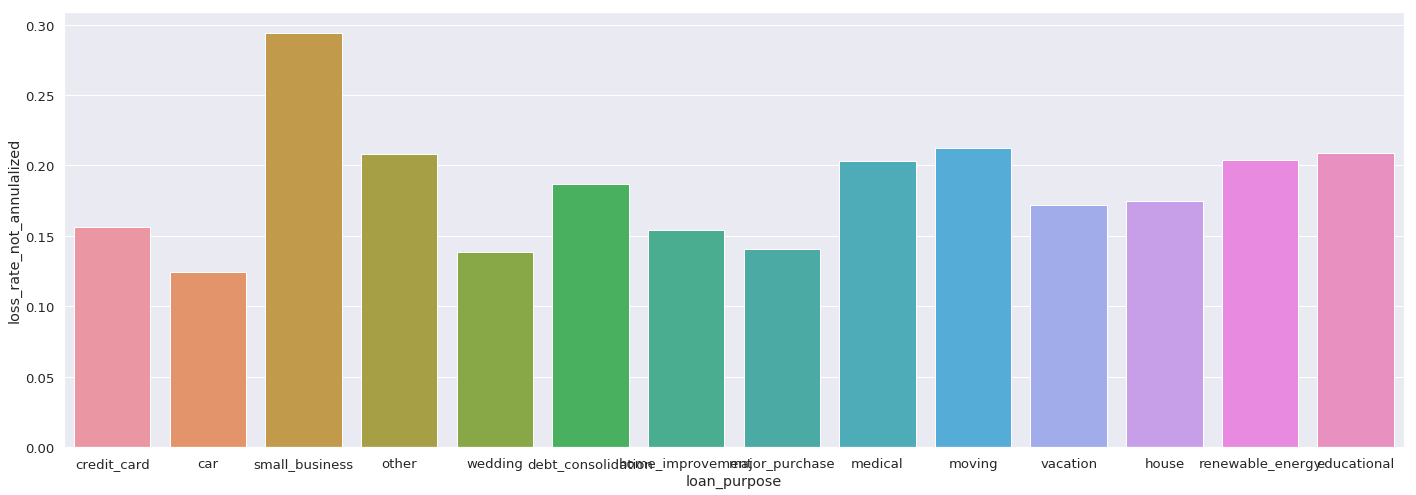

In [15]:
from matplotlib import pyplot as plt
sns.set(font_scale=1.2)
plt.figure(figsize=(24,8))
ax = sns.barplot(x="loan_purpose", y="loss_rate_not_annulalized", data=test)


### loss rate annualized X purpose scatter plot

/Users/Mac/anaconda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(54.78474521375868, 0.5, 'Profit Size')

<Figure size 360x576 with 0 Axes>

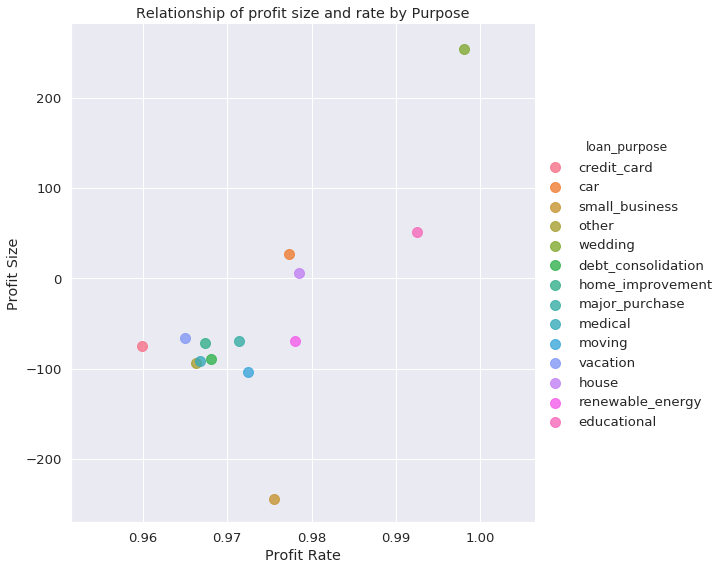

In [16]:
sns.set(font_scale=1.2)
plt.figure(figsize=(5,8))
sns.lmplot(x="annual_avg_profit_rate", y="annual_avg_profit_size",
                      hue="loan_purpose",data=test,fit_reg=False,
                    scatter_kws={"marker": "D", # Set marker style
                        "s": 100},size=8) # S marker size)

# Set title
plt.title('Relationship of profit size and rate by Purpose')

# Set x-axis label
plt.xlabel('Profit Rate')

# Set y-axis label
plt.ylabel('Profit Size')

/Users/Mac/anaconda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(55.29719855577257, 0.5, 'Bad Loan %')

<Figure size 360x576 with 0 Axes>

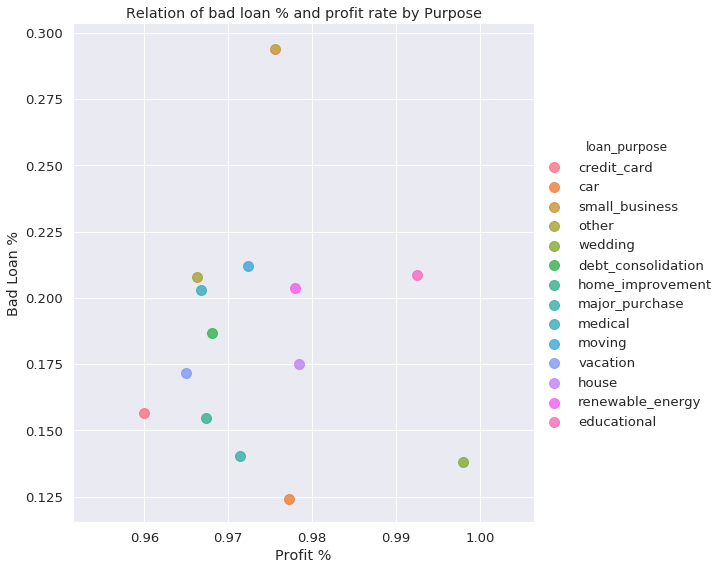

In [17]:
sns.set(font_scale=1.2)
plt.figure(figsize=(5,8))
sns.lmplot(x="annual_avg_profit_rate", y="loss_rate_not_annulalized",
                      hue="loan_purpose",data=test,fit_reg=False,
                    scatter_kws={"marker": "D", # Set marker style
                        "s": 100},size=8) # S marker size)

# Set title
plt.title('Relation of bad loan % and profit rate by Purpose')

# Set x-axis label
plt.xlabel('Profit %')

# Set y-axis label
plt.ylabel('Bad Loan %')

#### Time Series analysis on loan by purpose

In [18]:
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015]
purpose_d = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house',
       'educational']
purpose = ['educational']
# 36 months loan

year =3
data = []
for each_purpose in purpose_d:
    for each_year in years:

        # get df by year and grade and 36 months term 
        info = df[(df["year"]== each_year)&(df["purpose"]== each_purpose)]

        # ann_rate_list 
        average_annual_profit_rate = info['annual_profit_rate'].mean()


        # good loan annual interest rate avg
        good_df = info[(info["loan_condition"]=="Good Loan")]
        average_good_annual_rate = good_df['annual_profit_rate'].mean()

        #loss rate avg per year 

        bad = len(info[(info["loan_condition"]=="Bad Loan")])
        good = len(info[(info["loan_condition"]=="Good Loan")])
        if bad ==0:
            print(each_purpose + ' '+ str(each_year)+' '+ ' bad_loan number is 0')
            bad=1
        if good ==0:
            print(each_purpose + ' '+ str(each_year)+' '+ ' good_loan number is 0')
            good=1
        loss_rate_not_annulalized = bad/(bad+good)

        #mean_profit_rate
        annual_avg_profit_size = info['annual_profit_size'].mean()

        content = [each_year,each_purpose,average_annual_profit_rate, average_good_annual_rate,
                   annual_avg_profit_size,loss_rate_not_annulalized]
        data.append(content)


        
test = pd.DataFrame(data,columns=['year','purpose','annual_int_rate','good_annual_int_rate','average_profit_size'
                                  ,'loss_rate_not_annualized'])

purpose_int_plot= test.sort_values('year', ascending = True)


wedding 2014  bad_loan number is 0
wedding 2015  bad_loan number is 0
vacation 2008  bad_loan number is 0
educational 2011  bad_loan number is 0
educational 2011  good_loan number is 0
educational 2012  bad_loan number is 0
educational 2012  good_loan number is 0
educational 2013  bad_loan number is 0
educational 2013  good_loan number is 0
educational 2014  bad_loan number is 0
educational 2014  good_loan number is 0
educational 2015  bad_loan number is 0
educational 2015  good_loan number is 0


###  loss rate annualized X small business by year statistics

In [19]:
print("    small_business_by_year   ")
purpose_int_plot.head()

    small_business_by_year   


,year,purpose,annual_int_rate,good_annual_int_rate,average_profit_size,loss_rate_not_annualized
0,2007,credit_card,1.000158,1.000341,19.531096,0.137931
99,2007,house,0.999895,1.000316,-30.539153,0.250000
90,2007,vacation,0.999817,1.000214,9.298333,0.250000
27,2007,other,0.999808,1.000311,-2.621269,0.230088
81,2007,moving,0.998993,1.000361,-28.013151,0.533333


###  loss rate annualized X small business by year plot


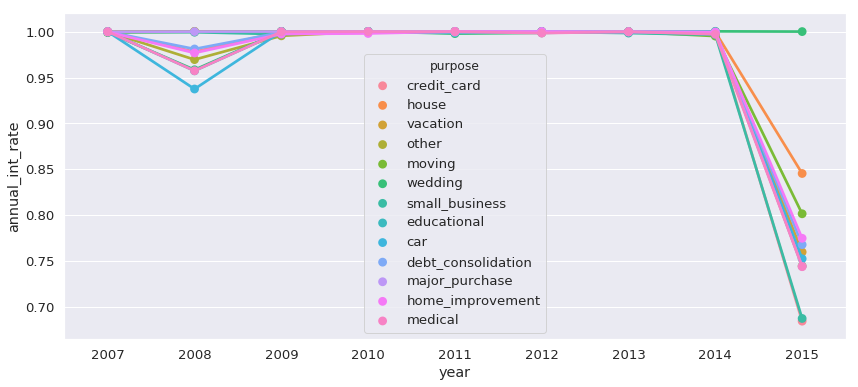

In [20]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='year', y='annual_int_rate', 
                  data= purpose_int_plot, hue= 'purpose')

### Findings and what we learn from Exploratory Data Analysis
_1)_ col(emp_length) has no significant impact on loss rate. 
> -  When we bucket emp_length by years, there is no obvious pattern for us to conclude the longer your employment history is, the lower the risk you default. 

_2)_ col(loan_purpose) can be used to further classify loans. 
> -  When classifying loans by purpose, we observe that certain groups have higher or lower loss rate.  

_3)_ Use extra metrics to evaluate loan profitability.
> -  When evaluating loan's profitability, we should look at "annualized" loss rate, profit size and profit rate.


_4)_ Annual loss rate by purpose varies year by year 
> -  We surprisingly find out that loss rate varies by year. From 2007 to 2014, the variation of loss rate is minor. However, the loss rate **drops dramatically at 2015**. 



### Business Question: 
####  Q-1: What rate of return have 36m loans generated on average?   
####  Q-2: When bucketed by year of origination and grade, which cohort had the highest rate of return?   

_1)_ Define rate of return: 
> -  The definition of rate of return varies. Annualized rate of return fits better here:

> $$
\begin{array}{rrcl}
  & AnnualProfitRate
  & & \equiv & \frac{TotalPayment}{InitialFund}^ \frac{1}{Years} - 1
\end{array}
$$

_2)_ Create two extra metrics to evaluate loan profitability. 
> -  Rate of return is indeed an important metric but we should also consider **the size of the profit** and the loan's **default rate**, which will enable us to have a comprehensive understanding of loan profitability. 

>\begin{array}{rrcl}
  & AnnualProfitSize
  & & \equiv &  \frac{TotalPayment- InitialFund}{Years}
\end{array}

>$$
\begin{array}{rrcl}
  & AnnualLossRate
  & &      \equiv &  1 - {(1 - LossRateNotAnnual)}^ \frac{1}{Years}
\end{array}
$$

_3)_ Create another metric to specifically focus on good loan profitability. 
> -  We want to know  the profitability of (good+bad loan) but we also want to understand the difference between two groups. 

_4)_ Classify loans by purpose and evaluate their return rate. 
> -  We learned from Q1 that loan purpose is a good variable to classify loans since the default rate varies by purpose.






#### Data Prepocssing 
- Get month duration for each loan. 
- Get duration of the loan.

In [21]:
df['issue_d_format'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['last_pymnt_d_format'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')
df['Months'] = ((df.last_pymnt_d_format.dt.year - df.issue_d_format.dt.year) * 12 +
                (df.last_pymnt_d_format.dt.month -  df.issue_d_format.dt.month))
df['Months'].replace([np.inf, -np.inf], np.nan)
df.dropna(subset=['Months'],how='any')

df['duration']= df['total_pymnt_inv']/df['installment']
df['duration'] = df['duration'].astype(int)
df[['duration','loan_status','term']].head()


,duration,loan_status,term
0,35,Fully Paid,36 months
1,16,Charged Off,60 months
2,35,Fully Paid,36 months
3,36,Fully Paid,36 months
5,35,Fully Paid,36 months


#### Q-1 : What rate of return have these loans generated on average?


In [22]:
import math
# for 36months loan
year = 3 
purpose = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']
data = []
for item in purpose:
    purpose_df = df[(df["purpose"]==item)&(df["term_num"]==36)]
    # annual interest rate average
    purpose_df['annual_int'] = (purpose_df['total_pymnt_inv']/purpose_df['funded_amnt_inv'])**(1/year)
    ann_rate = purpose_df['annual_int']
    ann_rate_list = []
    for int_rate in ann_rate:
        if math.isnan(int_rate):
            pass
        else:
            ann_rate_list.append(float(int_rate))
#    print(ann_rate_list)
    avg_int_rate = sum(ann_rate_list)/len(ann_rate_list)
    # good loan mean_profit_size
    good_df = purpose_df[(purpose_df["loan_condition"]=="Good Loan")]
    good_ann_rate = good_df['annual_int']
    good_ann_rate_list = []
    for int_rate in good_ann_rate:
        if math.isnan(int_rate):
            pass
        else:
            good_ann_rate_list.append(float(int_rate))
    good_avg_int_rate = sum(good_ann_rate_list)/len(good_ann_rate_list)    
    
    #profit_size
    profit_size = purpose_df['annual_profit_size']
    annual_mean_profit_size = profit_size.mean() 
    
    #loss rate avg per year 
    bad = len(df[(df["purpose"]==item)&(df["loan_condition"]=="Bad Loan")])
    good = len(df[(df["purpose"]== item)&(df["loan_condition"]=="Good Loan")])
    loss_3_year = (bad/(good+bad))
    annual_loss = 1-((1-loss_3_year)**(1/year))
    content = [item,bad,good,avg_int_rate,annual_mean_profit_size,annual_loss,good_avg_int_rate]
    data.append(content)

test = pd.DataFrame(data,columns=['loan_purpose','bad_loan','good_loan','avg_annual_int_rate','annual_avg_profit_size'
                                 ,'loss_rate_per_year','good_avg_annual_int_rate'])  
test.sort_values('good_avg_annual_int_rate', ascending = False)

/Users/Mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,loan_purpose,bad_loan,good_loan,avg_annual_int_rate,annual_avg_profit_size,loss_rate_per_year,good_avg_annual_int_rate
4,wedding,278,1733,1.014753,263.291030,0.048383,1.050950
2,small_business,1443,3464,0.951882,-151.836662,0.109596,1.048703
13,educational,88,334,0.986552,51.621433,0.074994,1.047799
12,renewable_energy,55,215,0.972900,-20.072296,0.073117,1.046596
3,other,3057,11644,0.956230,-41.055206,0.074766,1.042760
9,moving,440,1634,0.955251,-69.873490,0.076406,1.042754
8,medical,591,2321,0.952331,-54.444849,0.072826,1.041597
5,debt_consolidation,27891,121572,0.968239,1.997007,0.066531,1.040176
10,vacation,276,1331,0.958521,-36.338487,0.060881,1.039664
0,credit_card,7895,42521,0.967182,0.882420,0.055189,1.039369


####  Q-2: When bucketed by year of origination and grade, which cohort had the highest rate of return?   


In [23]:
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015]
# 36 months loan
year =3
data = []
grades = ['A','B','C','D','E','F','G']
for each_year in years:
    for each_grade in grades:
        
        # get df by year and grade and 36 months term 
        info = df[(df["year"]==each_year)&(df["grade"]==each_grade)&(df["term_num"]==36)]
        # ann_rate_list 
        info['annual_int'] = (info['total_pymnt_inv']/info['funded_amnt_inv'])**(1/year)
        ann_rate = info['annual_int']
        ann_rate_list = []
        for int_rate in ann_rate:
            if math.isnan(int_rate):
                pass
            else:
                ann_rate_list.append(float(int_rate))
        avg_int_rate = sum(ann_rate_list)/len(ann_rate_list)

        # good loan annual interest rate avg
        good_df = info[(info["loan_condition"]=="Good Loan")]
        good_ann_rate = good_df['annual_int']
        good_ann_rate_list = []
        for int_rate in good_ann_rate:
            if math.isnan(int_rate):
                pass
            else:
                good_ann_rate_list.append(float(int_rate))    
        good_avg_int_rate = sum(good_ann_rate_list)/len(good_ann_rate_list)    

        #loss rate avg per year 
        bad = len(info[(info["loan_condition"]=="Bad Loan")])
        good = len(info[(info["loan_condition"]=="Good Loan")])
        loss_3_year = (bad/(good+bad))
        annual_loss = 1-((1-loss_3_year)**(1/year))

        #mean_profit_rate
        profit_size = info['annual_profit_size']
        annual_profit_size = profit_size.mean()

        content = [each_year,each_grade,avg_int_rate,good_avg_int_rate,annual_profit_size,annual_loss,good,bad]
        data.append(content)
        
        
test = pd.DataFrame(data,columns=['year','grade','annual_int_rate','good_annual_int_rate','average_profit_size','loss_rate_per_year','good_loan_num','bad_loan_num'])  


/Users/Mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [24]:
test.sort_values('annual_int_rate', ascending = False).head()


,year,grade,annual_int_rate,good_annual_int_rate,average_profit_size,loss_rate_per_year,good_loan_num,bad_loan_num
41,2012,G,1.042903,1.101551,1888.399306,0.058964,20,4
40,2012,F,1.032257,1.094894,1104.814110,0.065712,84,19
39,2012,E,1.031268,1.089113,1034.109503,0.078697,617,172
0,2007,A,1.026496,1.031123,48.934659,0.017395,74,4
32,2011,E,1.024059,1.080135,729.952095,0.073963,216,56


### Findings and what we learn from business questions
_1)_ Loans for Weddings have the highest annual return rate.  
> -  Weddings outperforms all other purposes in almost every metric. It is the safest group to invest. 

_2)_ Upon looking at small business loans, we see there is a huge gap between (bad+good) vs (good) loan loss rate. 
> -  This may imply that "small business" is the type of loan that is high return and high risk. Being able to detect default loan is fairly important here. It will be interesting to further analyze this group. 


_3)_ (Year 2012,G) has the highest annual return, followed by (Year 2012,F).
> -  Although cohort (2012,G) is the top1, the size is relatively small. Cohort (2012,F) will be a better group to consider. 




### Model/Deploy - Build Model to increase return rate 

_1)_ Based on the question being asked, we can set our goal as ** maximizing the return rate**. 

_2)_ Further break down ** maximizing the return rate**:  

> - **Being able to predict whether the loan will default**. (Choose to work on this)
- Being able to predict the return rate for the non-default loan. 


_3)_ Use Random Forest to build the model:
- Use one-hot encoding for non-ordinal categorical variables.
- Use label encoding for ordinal categorical variables. 

_4)_ Conduct Time Series analysis on return rate.  


In [25]:
#select columns 
purpose_df = df[(df["purpose"]=='small_business')&(df["term_num"]==36)]
purpose_df = purpose_df[['funded_amnt_inv','int_rate','grade','annual_inc','verification_status','emp_length','loan_condition','tot_cur_bal','home_ownership','year']]
purpose_df.describe()
good = purpose_df[(purpose_df["loan_condition"]=='Good Loan')]
bad = purpose_df[(purpose_df["loan_condition"]=='Bad Loan')]
print(len(good))
print(len(bad))



2806
949


In [26]:
percent = purpose_df.isnull().sum()/len(purpose_df)
missing_value = pd.concat([purpose_df.isnull().sum(), percent], axis=1)
missing_value_re = missing_value.rename(columns = {0 : 'Total', 1 : 'Percent'})
missing_value = missing_value_re[
            missing_value_re.iloc[:,1] != 0].sort_values(
        'Percent', ascending=False).round(2)
missing_value


,Total,Percent
tot_cur_bal,2103,0.55


In [27]:
'funded_amnt_inv','int_rate','grade','annual_inc','verification_status','emp_length','loan_condition','tot_cur_bal','home_ownership'
print(purpose_df.isnull().any())
print( "tot_cur_bal nan number is : " + str(purpose_df['tot_cur_bal'].isna().sum()))
# drop tot_cur_bal since



funded_amnt_inv        False
int_rate               False
grade                  False
annual_inc             False
verification_status    False
emp_length             False
loan_condition         False
tot_cur_bal             True
home_ownership         False
year                   False
dtype: bool
tot_cur_bal nan number is : 2103


In [28]:
purpose_df.drop(columns = ['tot_cur_bal']).head()


,funded_amnt_inv,int_rate,grade,annual_inc,verification_status,emp_length,loan_condition,home_ownership,year
2,2400.0,15.96,C,12252.0,Not Verified,10,Good Loan,RENT,2011
45,14000.0,9.91,B,80000.0,Not Verified,6,Good Loan,RENT,2011
78,15000.0,7.90,A,52000.0,Not Verified,1,Good Loan,MORTGAGE,2011
110,5500.0,6.62,A,110000.0,Verified,8,Good Loan,MORTGAGE,2011
139,6200.0,6.03,A,26500.0,Not Verified,5,Good Loan,MORTGAGE,2011


#### data prepocessing - categorical variables  
- Label encoding
- One-hot encoding 

In [29]:
def loan_condition(status):
    if status == 'Good Loan':
        return int(1)
    elif status == 'Bad Loan':
        return int(0)
    
def grade(status):
    if status == 'A':
        return int(7)
    elif status == 'B':
        return int(6)
    if status == 'C':
        return int(5)
    elif status == 'D':
        return int(4)
    if status == 'E':
        return int(3)
    elif status == 'F':
        return int(2)
    elif status == 'G':
        return int(1)
    
def verification_status(status):
    if status == 'Verified':
        return int(2)
    elif status == 'Not Verified':
        return int(0)
    else :
        return int(1)
    
purpose_df['loan_condition_dummy'] = purpose_df['loan_condition'].apply(loan_condition)
purpose_df['grade_dummy'] = purpose_df['grade'].apply(grade)
purpose_df['status_dummy'] = purpose_df['verification_status'].apply(verification_status)
purpose_df['emp_length'] = purpose_df['emp_length'].astype(int)
#for item in df['loan_condition_dummy']:
#    if item is np.nan or item is np.inf:
#        print(item)

#purpose_df.drop(columns = ['loan_condition','grade','verification_status']).head()


In [30]:
purpose_df.head()

,funded_amnt_inv,int_rate,grade,annual_inc,verification_status,emp_length,loan_condition,tot_cur_bal,home_ownership,year,loan_condition_dummy,grade_dummy,status_dummy
2,2400.0,15.96,C,12252.0,Not Verified,10,Good Loan,NaN,RENT,2011,1.0,5,0
45,14000.0,9.91,B,80000.0,Not Verified,6,Good Loan,NaN,RENT,2011,1.0,6,0
78,15000.0,7.90,A,52000.0,Not Verified,1,Good Loan,NaN,MORTGAGE,2011,1.0,7,0
110,5500.0,6.62,A,110000.0,Verified,8,Good Loan,NaN,MORTGAGE,2011,1.0,7,2
139,6200.0,6.03,A,26500.0,Not Verified,5,Good Loan,NaN,MORTGAGE,2011,1.0,7,0


#### one-hot encoding

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
 
def encode_onehot(df, cols):
    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict('records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df

purpose_df = encode_onehot(purpose_df, cols=['home_ownership'])


In [32]:
purpose_df_year = purpose_df.drop(columns = ['loan_condition','grade','verification_status','tot_cur_bal'])
purpose_df = purpose_df.drop(columns = ['loan_condition','grade','verification_status','tot_cur_bal','year'])
purpose_df.dropna(how='any',inplace=True)
purpose_df['loan_condition_dummy'].astype(int)
print('')

####  Modeling 

In [33]:
purpose_df.head()


,funded_amnt_inv,int_rate,annual_inc,emp_length,loan_condition_dummy,grade_dummy,status_dummy,home_ownership=MORTGAGE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
2,2400.0,15.96,12252.0,10,1.0,5,0,0.0,0.0,0.0,1.0
45,14000.0,9.91,80000.0,6,1.0,6,0,0.0,0.0,0.0,1.0
78,15000.0,7.90,52000.0,1,1.0,7,0,1.0,0.0,0.0,0.0
110,5500.0,6.62,110000.0,8,1.0,7,2,1.0,0.0,0.0,0.0
139,6200.0,6.03,26500.0,5,1.0,7,0,1.0,0.0,0.0,0.0


In [71]:
from sklearn.model_selection import train_test_split
#'funded_amnt_inv','int_rate','grade','annual_inc','verification_status','emp_length','loan_condition','zip_code','tot_cur_bal'
#,'home_ownership','loan_condition_dummy']]

X = purpose_df[['funded_amnt_inv','int_rate','annual_inc',
                'emp_length','grade_dummy', 'status_dummy',
       'home_ownership=MORTGAGE', 'home_ownership=OTHER', 'home_ownership=OWN',
       'home_ownership=RENT']]
Y = purpose_df[['loan_condition_dummy']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [72]:
purpose_df['loan_condition_dummy'].unique()

array([1., 0.])

In [73]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

/Users/Mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


#### all years

In [74]:
#import scikit-learn metrics module for accuracy calculation

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
all_year = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.6965394853593612


#### return rate of "small business" group by year

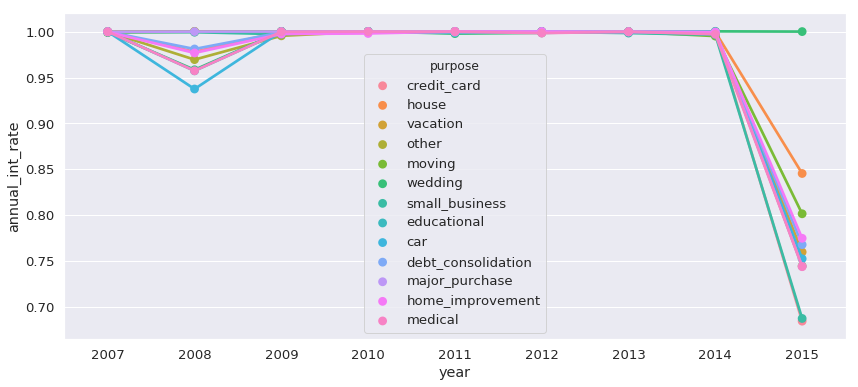

In [38]:
plt.figure(figsize = (14,6))
g = sns.pointplot(x='year', y='annual_int_rate', 
                  data= purpose_int_plot, hue= 'purpose')

In [39]:
purpose_int_plot[purpose_int_plot['purpose']=='small_business']

,year,purpose,annual_int_rate,good_annual_int_rate,average_profit_size,loss_rate_not_annualized
18,2007,small_business,0.999522,1.000378,-42.516338,0.428571
19,2008,small_business,0.999351,1.000295,-106.277255,0.346457
20,2009,small_business,0.997154,1.000378,110.552681,0.236413
21,2010,small_business,0.999817,1.000344,101.292699,0.274678
22,2011,small_business,0.998536,1.000318,-76.329710,0.309609
23,2012,small_business,0.999797,1.000349,11.656345,0.258089
24,2013,small_business,0.998409,1.000354,-203.355851,0.347607
25,2014,small_business,0.996492,1.000258,-675.799286,0.343885
26,2015,small_business,0.687739,1.000111,-1656.719371,0.188462


In [41]:
purpose_df_year_except_2015 = purpose_df_year[purpose_df_year['year']!=2015]
purpose_df_year_2015 = purpose_df_year[purpose_df_year['year']==2015]
purpose_df_year_except_2015.dropna(how='any',inplace=True)
purpose_df_year_2015.dropna(how='any',inplace=True)
purpose_df_year_except_2015['loan_condition_dummy'].astype(int)
purpose_df_year_2015['loan_condition_dummy'].astype(int)
print('')

/Users/Mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### years except 2015

In [76]:

X = purpose_df_year_except_2015[['funded_amnt_inv','int_rate','annual_inc',
                'emp_length','grade_dummy', 'status_dummy',
       'home_ownership=MORTGAGE', 'home_ownership=OTHER', 'home_ownership=OWN',
       'home_ownership=RENT']]
Y = purpose_df_year_except_2015[['loan_condition_dummy']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Import Random Forest Model
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=15)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
except_2015 = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.7068723702664796


/Users/Mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


#### year 2015

In [78]:

X = purpose_df_year_2015[['funded_amnt_inv','int_rate','annual_inc',
                'emp_length','grade_dummy', 'status_dummy',
       'home_ownership=MORTGAGE', 'home_ownership=OTHER', 'home_ownership=OWN',
       'home_ownership=RENT']]
Y = purpose_df_year_2015[['loan_condition_dummy']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Import Random Forest Model
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
year_2015 = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.7692307692307693


/Users/Mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [79]:
purpose_df_year_2015.head()

,funded_amnt_inv,int_rate,annual_inc,emp_length,year,loan_condition_dummy,grade_dummy,status_dummy,home_ownership=MORTGAGE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
486995,30000.0,17.57,140000.0,1,2015,1.0,4,1,0.0,0.0,0.0,1.0
501384,34950.0,18.20,210000.0,8,2015,1.0,3,2,1.0,0.0,0.0,0.0
508670,10000.0,12.59,70000.0,7,2015,1.0,5,0,0.0,0.0,1.0,0.0
544430,12275.0,20.99,80000.0,3,2015,1.0,3,2,1.0,0.0,0.0,0.0
564577,25775.0,15.61,95000.0,9,2015,1.0,4,0,0.0,0.0,0.0,1.0


#### Compare the accuracy of different groups.  
> 2015, 2007 - 2014, all years 

In [56]:
summary = []
# year 2015
good = purpose_df_year_2015[(purpose_df_year_2015["loan_condition_dummy"]==1)]
bad = purpose_df_year_2015[(purpose_df_year_2015["loan_condition_dummy"]==0)]
accuracy = year_2015
summary.append(['2015',len(good),len(bad),accuracy])
# except 2015
good = purpose_df_year_except_2015[(purpose_df_year_except_2015["loan_condition_dummy"]==1)]
bad = purpose_df_year_except_2015[(purpose_df_year_except_2015["loan_condition_dummy"]==0)]
accuracy = except_2015
summary.append(['2007-2014',len(good),len(bad),accuracy])
# all years
good = purpose_df_year[(purpose_df_year["loan_condition_dummy"]==1)]
bad = purpose_df_year[(purpose_df_year["loan_condition_dummy"]==0)]
accuracy = all_year
summary.append(['all',len(good),len(bad),accuracy])
summary = pd.DataFrame(summary,columns=['year_used', 'good loan','bad loan','accuracy'])  
summary.sort_values('accuracy', ascending = False)



,year_used,good loan,bad loan,accuracy
0,2015,158,34,0.769231
2,all,2806,949,0.712511
1,2007-2014,2648,915,0.705470


### Findings and what we learn from Model/Deploy
_1)_ Accuracy rate around 70% is our benchmark for predicting default loan on small business. 

_2)_ Further splitting the data by year is necessary for modelling. 
> - Based on the plot at Exploratory Data part, we know that return rate drops dramatically at Year 2015. By splitting our data into Year 2015 and 2007-2014, the accuracy rate increases dramatically for 2015. 


_3)_ Reasons to choose Random Forest and its pro and cons. 
> -  Random Forest is **straightforward to explain to client** compared to other ML models like SVM, Neural Network. 
> -  It can deal with both categorical and continuous variables.
> -  It is one of the most accurate learning algorithms available, thanks to its multiple trees designs. 
> -  One-hot encoding technique can really blow up quickly and we will start fighting with the curse of dimensionality.
> -  Over-fitting can easily occur. 
> -  Need to find the ideal number of trees. 

_3)_ Next steps
> - Further examine other purpose and see whether **splitting by year affects accuracy on other groups** as well. 
> - Add more variables when building model. (Due to high number of missing values, lots of variables are dropped here)
> - Build the model to **predict return rate for fully-paid loans** will be our next step in order to **"maximizing the return rate"**. 
> - **Competitor analysis**. See if user have and what options to choose from other platforms. 
> - **Personal endurance** testing on deciding the range of interest rate users can accpet. 



## END 